## Esta parte técnica no se explica por el momento

In [1]:
%matplotlib inline
import os
import folium
import sys
from IPython.display import HTML
import shapely.geometry as geometria
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
sys.path.insert(0, 'scripts')

from mapitas import mapa, figura

In [2]:
archivo = ['data/geodata/delegaciones_df.geojson']
archivos = ['data/geodata/delegaciones_df.geojson','data/geodata/cuadrantes2015.geojson']

# Ciencia de Datos
* Es un campo interdisciplinario sobre procesos y sistemas que buscan extraer conocimiento y comprensión (explicación y predicción) de los datos disponibles.
* Se enfoca más en la correlación que en la causalidad.

## Enfoque interdisciplinario
1. Bases de datos
2. Sistemas de Big Data.
3. Estadística.
4. Aprendizaje Máquina.
5. Minería de Datos
6. Visualización de datos
7. Dominio del tema de aplicación

# Análisis Geoespacial de Datos

Como nativos o visitantes de esta gran ciudad, es común recurrir a tecnologías de localización como Google o Apple maps para encontrar productos o servicios, sin embargo, el análisis geoespacial va más allá de solo estos sencillas conceptos y sus usos se extienden desde la topografía hasta la publicidad focalizada.

In [3]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/7bXJ_obaiYQ" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

## Análisis Geoespacial de datos es un caso especial del análisis de datos.

* Tipos de datos especiales.
* Múltiples aplicaciones de interés:
    * Tráfico Urbano.
    * Salud.
    * Política.
    * Inteligencia de negocios.
    * Hidrología
    * y más...

## Tecnologías en el análisis geoespacial de datos

* Sistemas de información geográfica (QGIS).
* Bases de datos geográficas (PostgreSQL + PostGIS).
* Análisis de datos (R & Python).
* Sistemas de Big data (Hadoop).


# Conceptos básicos:

El tipo de dato geoespacial más básico es el punto, para definir un punto usamos las siguientes instrucciones:

In [4]:
p1 = geometria.Point(0,0)
print(p1)

POINT (0 0)


El siguiente tipo de dato básico es el polígono, este es una superficie en dos dimensiones que guarda una secuencia de puntos(__el orden es importante__) que definen la forma exterior.

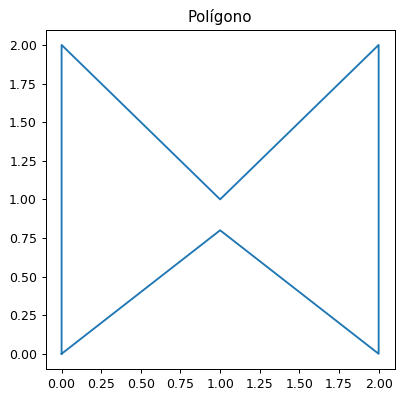

In [5]:
poly = geometria.Polygon([(0, 0), (0, 2), (1, 1),(2, 2), (2, 0), (1, 0.8), (0, 0)])
figura(poly)

Existen muchos tipos de datos especiales más como:
* LineString
* MultiPoint
* MultiLineString
* MultiPolygon
* GeometryCollection.

Ya antes trabajamos con el paquete de python **Pandas**, que nos permite trabajar con datos de distintos tipo, pero que sin embargo no soporta tipos de datos espaciales.

Además los formatos comunes de intercambio de datos como el muy popular **JSON** (JavaScript Object Notation) no manejan de forma nativa estos datos.

En este caso recurrimos a [GeoPandas](https://github.com/geopandas/geopandas) y [GeoJSON](http://geojson.org/), ambos extienden las capacidades de sus pares para manejar tipos de datos geográficos.

Por ejemplo, repitamos parte del ejercicio anterior con un conjunto de datos que incluye tipos geográficos:

In [6]:
metro = gpd.read_file('data/geodata/metro-cdmx.geojson')
metro

,name,geometry
0,Mixcoac,POINT (-99.18731699999999 19.376053)
1,Aquiles Serdán,POINT (-99.19542800000001 19.490868)
2,San Antonio,POINT (-99.18633 19.384312)
3,Balderas,POINT (-99.148951 19.427036)
4,Juárez,POINT (-99.147727 19.433369)
5,Hidalgo,POINT (-99.146805 19.437416)
6,San Pedro de los Pinos,POINT (-99.185557 19.391356)
7,Guerrero,POINT (-99.145088 19.444842)
8,Tacubaya,POINT (-99.186459 19.401961)
9,Tlatelolco,POINT (-99.143028 19.45589)


Suele suceder que tenemos algunos datos que no tienen campos con tipos geográficos pero si los elementos para construirlos, por ejemplo, nuestro conjunto principal de datos de hoy (datos de crímenes 2013-2016 [hoyodecrimen](https://hoyodecrimen.com/))

In [7]:
df = pd.read_csv('data/crimedata/Crimenes-lat-long2013-2016.csv')
df.head(20)

,cuadrante,crime,date,hour,year,month,lat,long
0,N-1.1.18,VIOLACION,2013-01-01,10:07,2013,1,19.544080,-99.124721
1,O-3.1.3,ROBO A NEGOCIO C.V.,2013-01-01,18:36,2013,1,19.188359,-99.074483
2,P-1.2.7,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-01,01:31,2013,1,19.380817,-99.199885
3,P-1.2.9,ROBO A TRANSEUNTE C.V.,2013-01-01,14:54,2013,1,19.369505,-99.199835
4,P-1.2.2,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-01,18:31,2013,1,19.393359,-99.199451
5,P-1.5.2,LESIONES POR ARMA DE FUEGO,2013-01-01,20:03,2013,1,19.387115,-99.221778
6,P-2.3.2,ROBO A TRANSEUNTE C.V.,2013-01-01,20:35,2013,1,19.506817,-99.201055
7,P-2.3.7,ROBO A TRANSEUNTE C.V.,2013-01-01,23:11,2013,1,19.499860,-99.191175
8,P-2.1.6,ROBO A TRANSEUNTE C.V.,2013-01-01,10:11,2013,1,19.468026,-99.184176
9,S-1.5.2,LESIONES POR ARMA DE FUEGO,2013-01-01,07:41,2013,1,NaN,NaN


Como todo conjunto de datos que se precie tiene valores no adecuados y/o campos vacíos, estos últimos los podemos contar con:

In [8]:
df[pd.isnull(df).any(axis=1)]

,cuadrante,crime,date,hour,year,month,lat,long
9,S-1.5.2,LESIONES POR ARMA DE FUEGO,2013-01-01,07:41,2013,1,NaN,NaN
16,C-2.4.8,LESIONES POR ARMA DE FUEGO,2013-01-01,17:31,2013,1,NaN,NaN
29,O-2.2.4,LESIONES POR ARMA DE FUEGO,2013-01-01,07:46,2013,1,NaN,NaN
30,O-2.2.4,LESIONES POR ARMA DE FUEGO,2013-01-01,18:31,2013,1,NaN,NaN
47,S-3.5.8,LESIONES POR ARMA DE FUEGO,2013-01-01,09:20,2013,1,NaN,NaN
58,(NO ESPECIFICADO),HOMICIDIO DOLOSO,2013-01-02,14:06,2013,1,NaN,NaN
164,(NO ESPECIFICADO),VIOLACION,2013-01-03,15:35,2013,1,NaN,NaN
392,O-2.1.17,LESIONES POR ARMA DE FUEGO,2013-01-04,07:34,2013,1,NaN,NaN
477,C-2.4.14,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-05,21:53,2013,1,NaN,NaN
483,N-1.2.5,LESIONES POR ARMA DE FUEGO,2013-01-05,07:40,2013,1,NaN,NaN



Lo ideal suele ser realizar alguna imputación de acuerdo a algún campo, cuando esto no es posible, eliminar la fila con datos vacíos es también aceptable.


In [9]:
df.dropna(axis=0, inplace=True)
df.head(20)

,cuadrante,crime,date,hour,year,month,lat,long
0,N-1.1.18,VIOLACION,2013-01-01,10:07,2013,1,19.544080,-99.124721
1,O-3.1.3,ROBO A NEGOCIO C.V.,2013-01-01,18:36,2013,1,19.188359,-99.074483
2,P-1.2.7,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-01,01:31,2013,1,19.380817,-99.199885
3,P-1.2.9,ROBO A TRANSEUNTE C.V.,2013-01-01,14:54,2013,1,19.369505,-99.199835
4,P-1.2.2,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-01,18:31,2013,1,19.393359,-99.199451
5,P-1.5.2,LESIONES POR ARMA DE FUEGO,2013-01-01,20:03,2013,1,19.387115,-99.221778
6,P-2.3.2,ROBO A TRANSEUNTE C.V.,2013-01-01,20:35,2013,1,19.506817,-99.201055
7,P-2.3.7,ROBO A TRANSEUNTE C.V.,2013-01-01,23:11,2013,1,19.499860,-99.191175
8,P-2.1.6,ROBO A TRANSEUNTE C.V.,2013-01-01,10:11,2013,1,19.468026,-99.184176
10,S-2.4.5,ROBO A TRANSEUNTE C.V.,2013-01-01,14:27,2013,1,19.332704,-99.173765


Dado que tenemos la latitud y longitud podemos generar un campo de tipo punto, para cada entrada de los datos y después generar un GeoDataFrame de geopandas para poder hacer uso posterior.

In [10]:
geometry = [geometria.Point(xy) for xy in zip(df.long, df.lat)]
geo_df = gpd.GeoDataFrame(df,geometry=geometry)
geo_df.head(20)

,cuadrante,crime,date,hour,year,month,lat,long,geometry
0,N-1.1.18,VIOLACION,2013-01-01,10:07,2013,1,19.544080,-99.124721,POINT (-99.12472080811609 19.5440795241155)
1,O-3.1.3,ROBO A NEGOCIO C.V.,2013-01-01,18:36,2013,1,19.188359,-99.074483,POINT (-99.0744830000001 19.1883590004325)
2,P-1.2.7,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-01,01:31,2013,1,19.380817,-99.199885,POINT (-99.19988545773801 19.3808172593185)
3,P-1.2.9,ROBO A TRANSEUNTE C.V.,2013-01-01,14:54,2013,1,19.369505,-99.199835,POINT (-99.1998346745779 19.3695046814212)
4,P-1.2.2,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-01,18:31,2013,1,19.393359,-99.199451,POINT (-99.1994512081143 19.3933594899586)
5,P-1.5.2,LESIONES POR ARMA DE FUEGO,2013-01-01,20:03,2013,1,19.387115,-99.221778,POINT (-99.2217777371028 19.38711527288)
6,P-2.3.2,ROBO A TRANSEUNTE C.V.,2013-01-01,20:35,2013,1,19.506817,-99.201055,POINT (-99.2010551691058 19.5068167104704)
7,P-2.3.7,ROBO A TRANSEUNTE C.V.,2013-01-01,23:11,2013,1,19.499860,-99.191175,POINT (-99.19117480519189 19.4998596459772)
8,P-2.1.6,ROBO A TRANSEUNTE C.V.,2013-01-01,10:11,2013,1,19.468026,-99.184176,POINT (-99.18417569249901 19.4680261030373)
10,S-2.4.5,ROBO A TRANSEUNTE C.V.,2013-01-01,14:27,2013,1,19.332704,-99.173765,POINT (-99.17376469820759 19.33270353793)


Ahora debemos determinar el area que nos interesa estudiar

In [11]:
mapa(archivo)

In [12]:
cuadrantes_vecinos= ['P-2.3.5','P-2.3.8','P-2.3.2','P-2.3.1', 'P-2.3.9', 'P-2.3.7']
area_interes = geo_df[geo_df['cuadrante'].isin(cuadrantes_vecinos)]
area_interes.head(10)

,cuadrante,crime,date,hour,year,month,lat,long,geometry
6,P-2.3.2,ROBO A TRANSEUNTE C.V.,2013-01-01,20:35,2013,1,19.506817,-99.201055,POINT (-99.2010551691058 19.5068167104704)
7,P-2.3.7,ROBO A TRANSEUNTE C.V.,2013-01-01,23:11,2013,1,19.499860,-99.191175,POINT (-99.19117480519189 19.4998596459772)
66,P-2.3.5,ROBO A REPARTIDOR C.V.,2013-01-02,10:23,2013,1,19.509876,-99.194639,POINT (-99.19463914629009 19.5098758700456)
67,P-2.3.9,ROBO A CUENTAHABIENTE C.V.,2013-01-02,13:20,2013,1,19.492668,-99.186839,POINT (-99.1868394613269 19.4926679770009)
68,P-2.3.7,ROBO A NEGOCIO C.V.,2013-01-02,14:32,2013,1,19.487867,-99.192064,POINT (-99.19206399999929 19.4878669996278)
180,P-2.3.1,ROBO A BORDO DE MICROBUS C.V.,2013-01-03,15:17,2013,1,19.510789,-99.200853,POINT (-99.2008526000003 19.5107885004396)
310,P-2.3.2,ROBO A TRANSEUNTE C.V.,2013-01-04,22:11,2013,1,19.504427,-99.202904,POINT (-99.2029042169455 19.5044268598094)
451,P-2.3.2,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-05,02:05,2013,1,19.508796,-99.205233,POINT (-99.20523270964649 19.5087963219929)
453,P-2.3.7,ROBO DE VEHICULO AUTOMOTOR S.V.,2013-01-05,23:22,2013,1,19.485143,-99.189881,POINT (-99.1898810863497 19.485143057362)
633,P-2.3.1,ROBO A BORDO DE MICROBUS C.V.,2013-01-07,14:07,2013,1,19.514543,-99.202997,POINT (-99.2029970884326 19.5145428730763)
